In [11]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from skimage import filters

### Buscar la carpeta de la muestra
Buscar la carpeta que se quiera estudiar. En esta estan las carpetas 'Point#' ,'Dark' y 'Positions'.
En algunos casos falta la carpeta 'Positions' entonces no se podra ejecutar la primera parte del notebook.

In [185]:
Path="C:/Users/mikel/LaserLab Dropbox/Proyectos/data/CMOS2/ITO/BOLD_128_A2_48h/BOLD_128_A2_48h_Ba2_zoomP10_P9_20220902/"
npoints=9
os.listdir(Path)


['Dark',
 'Point1',
 'Point2',
 'Point3',
 'Point4',
 'Point5',
 'Point6',
 'Point7',
 'Point8',
 'Point9',
 'Positions']

### Positions

Para ver que todos los puntos que se estudian estan en un mismo plano

In [186]:
Positions=Path+'Positions/xyzt.txt'
PosArray=np.loadtxt(Positions,delimiter=',')
print(PosArray)

[[11.66402925 15.8        15.          9.7444    ]
 [11.646027   16.         15.          9.7444    ]
 [11.62802475 16.2        15.          9.7444    ]
 [11.678031   15.8        15.33        9.7444    ]
 [11.66002875 16.         15.33        9.7444    ]
 [11.6420265  16.2        15.33        9.7444    ]
 [11.69203275 15.8        15.66        9.7444    ]
 [11.6740305  16.         15.66        9.7444    ]
 [11.65602825 16.2        15.66        9.7444    ]]


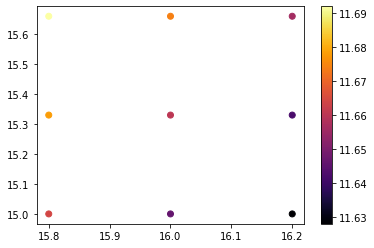

In [187]:
plt.figure()
plt.scatter(PosArray[:,1],PosArray[:,2],c=PosArray[:,0],cmap='inferno')
plt.colorbar()

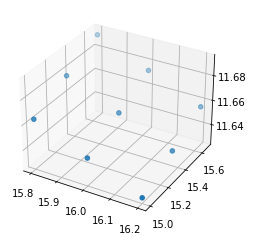

In [188]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(PosArray[:,1],PosArray[:,2],PosArray[:,0])

### Dark

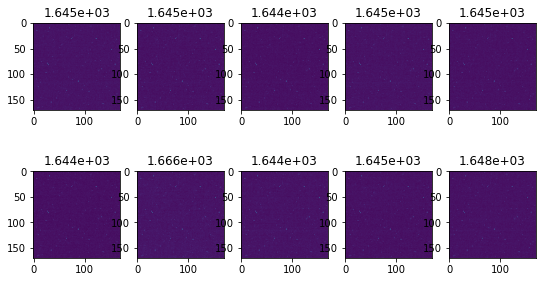

In [189]:
i=0
fig,axs=plt.subplots(2,5,figsize=(9,5))
for filt in range(2,12):
    image=Path+'Dark/Filter_{}_ExpoT_10s_dark.csv'.format(filt)
    imagearray=np.loadtxt(image)[140:310,170:340]
    axs[np.floor_divide(i,5),np.mod(i,5)].set_title('{:.3e}'.format(np.mean(imagearray)))
    axs[np.floor_divide(i,5),np.mod(i,5)].imshow(imagearray)
    i+=1

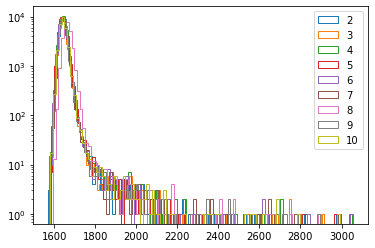

In [190]:
plt.figure()
for filt in range(2,11):
    image=Path+'Dark/Filter_{}_ExpoT_10s_dark.csv'.format(filt)
    imagearray=np.loadtxt(image)[140:310,170:340]
    plt.hist(imagearray.flatten(),bins=100,label=filt,histtype=u'step')
#plt.xscale('log')
plt.yscale('log')
plt.legend()

Hay algunos pixels que se saltan siempre. Para quitar estos he sumado todas las imagenes dark y he quitado los pixeles que mas intensidad dan. He escogido quitar los que se desvian mas de 5 sigmas de la media

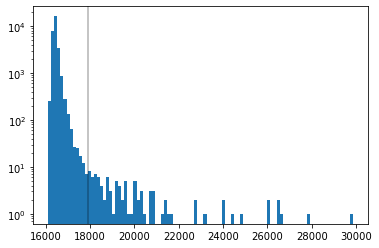

In [221]:
plt.figure()
image=Path+'Dark/Filter_{}_ExpoT_10s_dark.csv'.format(2)
suma=np.loadtxt(image)[140:310,170:340]
for filt in range(3,12):
    image=Path+'Dark/Filter_{}_ExpoT_10s_dark.csv'.format(filt)
    imagearray=np.loadtxt(image)[140:310,170:340]
    suma=suma+imagearray
mean,std=np.mean(suma),np.std(suma)
plt.hist(suma.flatten(),bins=100,log=True)
plt.axvline(x=mean+5*std,c='k',alpha=0.3)

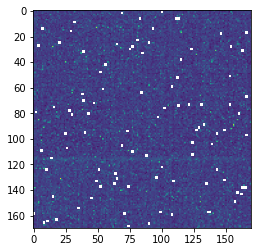

In [222]:
thresh=mean+5*std
mask=~(suma>thresh)
mask=mask*1.0
mask[mask == 0] = np.nan
suma1=suma*mask
plt.figure()
plt.imshow(suma1)

# Fijar punto y cambiar filtros

In [223]:
point=7

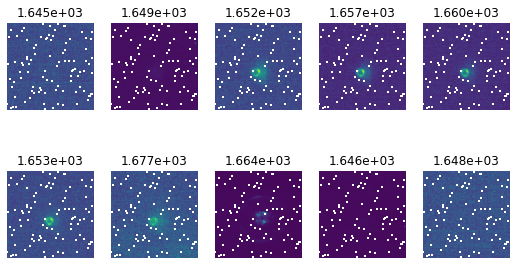

In [224]:
i=0
fig,axs=plt.subplots(2,5,figsize=(9,5))
for filt in range(2,12):
    image=Path+'Point{}/Filter_{}_rep_1_ExpoT_10s_Imag_1.csv'.format(point,filt)
    imagearray=np.loadtxt(image)[140:310,170:340]
    im=imagearray*mask
    axs[np.floor_divide(i,5),np.mod(i,5)].set_title('{:.3e}'.format(np.nanmean(im)))
    axs[np.floor_divide(i,5),np.mod(i,5)].imshow(im)
    axs[np.floor_divide(i,5),np.mod(i,5)].axis('off')
    i+=1
    #plt.tight_layout()

In [225]:
plt.close('all')

### Histogramas de un punto

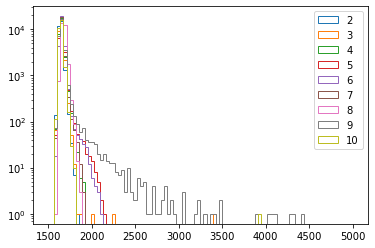

In [226]:
plt.figure()
for filt in range(2,11):
    image=Path+'Point{}/Filter_{}_rep_1_ExpoT_10s_Imag_1.csv'.format(point,filt)
    imagearray=np.loadtxt(image)[140:310,170:340]
    im=imagearray*mask
    a=im.flatten()
    plt.hist(a[~np.isnan(a)],bins=100,range=[1500, 5000],label=filt,histtype=u'step')
#plt.xscale('log')
plt.yscale('log')
plt.legend()

# Señal sin dark

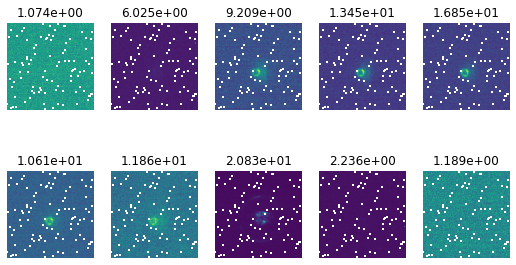

In [227]:
i=0
fig,axs=plt.subplots(2,5,figsize=(9,5))
for filt in range(2,12):
    image=Path+'Point{}/Filter_{}_rep_1_ExpoT_10s_Imag_1.csv'.format(point,filt)
    imagearray=np.loadtxt(image)[140:310,170:340]
    imagedark=Path+'Dark/Filter_{}_ExpoT_10s_dark.csv'.format(filt)
    imagearraydark=np.loadtxt(imagedark)[140:310,170:340]
    signal=imagearray-imagearraydark
    im=signal*mask
    axs[np.floor_divide(i,5),np.mod(i,5)].set_title('{:.3e}'.format(np.nanmean(im)))
    axs[np.floor_divide(i,5),np.mod(i,5)].imshow(im)
    axs[np.floor_divide(i,5),np.mod(i,5)].axis('off')
    i+=1

In [228]:
data=np.array([])
for filt in range(2,12):
    image=Path+'Point{}/Filter_{}_rep_1_ExpoT_10s_Imag_1.csv'.format(point,filt)
    imagearray=np.loadtxt(image)[140:310,170:340]
    imagedark=Path+'Dark/Filter_{}_ExpoT_10s_dark.csv'.format(filt)
    imagearraydark=np.loadtxt(imagedark)[140:310,170:340]
    signal=imagearray-imagearraydark
    signal=signal*mask
    signal=signal.flatten()
    data=np.append(data,signal)

In [229]:
mean,sigma=np.nanmean(data),np.nanstd(data)

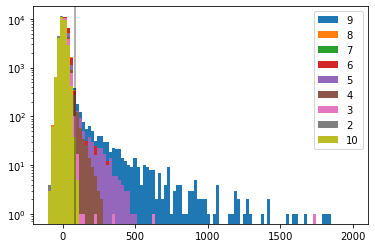

In [230]:
plt.figure()
for filt in [9,8,7,6,5,4,3,2,10]:
    image=Path+'Point{}/Filter_{}_rep_1_ExpoT_10s_Imag_1.csv'.format(point,filt)
    imagearray=np.loadtxt(image)[140:310,170:340]
    imagedark=Path+'Dark/Filter_{}_ExpoT_10s_dark.csv'.format(filt)
    imagearraydark=np.loadtxt(imagedark)[140:310,170:340]
    signal=(imagearray-imagearraydark)*mask
    plt.hist(signal.flatten(),bins=100,range=[-100, 2000],label=filt)
#plt.xscale('log')
plt.yscale('log')
plt.axvline(x=2*sigma+mean,c='k', alpha=0.3,linewidth=2)
plt.legend()

### Con threshold de 2 sigma

Para seleccionar la zona en la que se centra la señal aplico un threshold a 2 sigmas (habria que ver que threshold es el optimo) y me quito todos lo pixels con intensidades inferiores

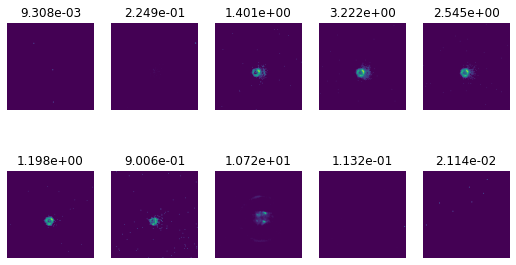

In [232]:
thresh=mean+2*sigma
i=0
fig,axs=plt.subplots(2,5,figsize=(9,5))
for filt in range(2,12):
    image=Path+'Point{}/Filter_{}_rep_1_ExpoT_10s_Imag_1.csv'.format(point,filt)
    imagearray=np.loadtxt(image)[140:310,170:340]
    imagedark=Path+'Dark/Filter_{}_ExpoT_10s_dark.csv'.format(filt)
    imagearraydark=np.loadtxt(imagedark)[140:310,170:340]
    signal=(imagearray-imagearraydark)*mask
    mask2=signal>thresh
    mask2=mask2*1.0
    mask2[mask2==0]=np.nan
    im=signal*mask2
    im[np.isnan(im)]=0.0
    axs[np.floor_divide(i,5),np.mod(i,5)].set_title('{:.3e}'.format(np.nanmean(im)))
    axs[np.floor_divide(i,5),np.mod(i,5)].imshow(im)
    axs[np.floor_divide(i,5),np.mod(i,5)].axis('off')
    i+=1

### Espectro
Falta tener en cuenta el ancho de los filtros

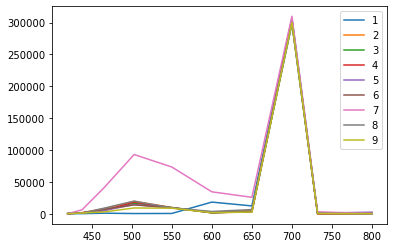

In [233]:
plt.figure()
for point in range (1,npoints+1):
    array=np.array([])
    for filt in range(2,12):
        image=Path+'Point{}/Filter_{}_rep_1_ExpoT_10s_Imag_1.csv'.format(point,filt)
        imagearray=np.loadtxt(image)[140:310,170:340]
        imagedark=Path+'Dark/Filter_{}_ExpoT_10s_dark.csv'.format(filt)
        imagearraydark=np.loadtxt(imagedark)[140:310,170:340]
        signal=(imagearray-imagearraydark)*mask
        mask2=signal>thresh
        mask2=mask2*1.0
        mask2[mask2==0]=np.nan
        im=signal*mask2
        im[np.isnan(im)]=0.0
        s=np.sum(im)
        array=np.append(array,s)
    x=[420,438,465,503,550,600,650,700,732,800]
    widths=[]
    plt.plot(x,array,label=point)
plt.legend()